In [2]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from pyimagesearch.nn import ShallowNet
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [11]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY) # TODO

[INFO] loading CIFAR-10 data...


In [12]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [13]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [14]:
print("[INFO] training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

[INFO] training network
Epoch 1/40
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8059 - accuracy: 0.3654 - val_loss: 1.6346 - val_accuracy: 0.4327
Epoch 2/40
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5506 - accuracy: 0.4601 - val_loss: 1.4981 - val_accuracy: 0.4616
Epoch 3/40
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4010 - accuracy: 0.5100 - val_loss: 1.3571 - val_accuracy: 0.5219
Epoch 4/40
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3157 - accuracy: 0.5386 - val_loss: 1.3580 - val_accuracy: 0.5168
Epoch 5/40
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2649 - accuracy: 0.5565 - val_loss: 1.4872 - val_accuracy: 0.5005
Epoch 6/40
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2280 - accuracy: 0.5699 - val_loss: 1.3575 - val_accuracy: 0.5245
Epoch 7/40
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1968 - accuracy: 0.5

In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.55      0.71      0.62      1000
  automobile       0.73      0.73      0.73      1000
        bird       0.47      0.42      0.44      1000
         cat       0.43      0.36      0.39      1000
        deer       0.54      0.42      0.47      1000
         dog       0.44      0.55      0.49      1000
        frog       0.64      0.67      0.65      1000
       horse       0.73      0.54      0.62      1000
        ship       0.65      0.76      0.70      1000
       truck       0.66      0.65      0.66      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



Text(0, 0.5, 'Loss/Accuracy')

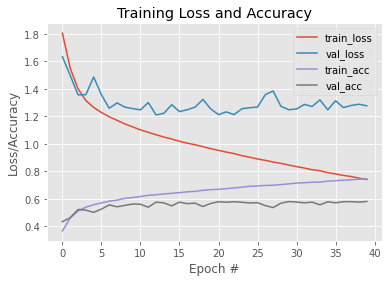

In [17]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")

plt.legend()
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")